## **Trabajo Final: Bank Subscription**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

Predecir que clientes se subscribirán a una campaña de marketing. Para ellos se les presentará un dataset con una cartera de clientes de 45.211 personas con 17 variables que muestran algunas características de los clientes en el banco.

#### Variables:
    -age: Edad del cliente
    -job: Tipo de empleo del cliente
    -martial status: Estado civil 
    -education: Educacion maxima alcanzada por el cliente
    -Credit: Si tiene deuda de crédito o no
    -balance: Promedio de saldo en la cuenta en el anio
    -housing loan: Si tiene seguro de hogar o no
    -Persona loan: Si tiene prestamos o no contact	tipo con contacto del cliente
    -Last Contact Day: Ultimo dia de contacto con el cliente en el mes
    -Last Contact Month: Ultimo mes de contacto con el cliente en el anio
    -Last Contact Duration: Duracion del ultimo contacto con el cliente medido en segundos 
    -campaign: Cantidad de contactos al cliente durante esta campania, incluye el último contacto.
    -pdays: Cantidad de dias que pasaron del último contacto con el cliente de una campania anterior. -1 significa que no hubo contacto previo
    -previous: Cantidad de contactos previos a esta campania para cada cliente
    -poutcome: Performance de la campania de marketing anterior para este cliente
    -Subscription: Si el cliente accede a la campania o no.

In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.datasets import load_boston
import plotly.express as px
warnings.filterwarnings('ignore')

In [2]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import svm

# EDA

In [3]:
# importo el archivo con los datos a analizar y lo guardo en la variable
banco = pd.read_csv('bank_subscription.csv')

In [4]:
#para corroborar que se haya cargado correctamente voy a ver el si se guardo como DataFrame y voy a visualizar las columnas
type(banco)

pandas.core.frame.DataFrame

In [5]:
np.shape(banco)

(45211, 18)

In [6]:
banco.head()

Unnamed: 0   Age           Job Marital Status  Education Credit  \
0           0  58.0    management        married        NaN     no   
1           1  44.0    technician         single  secondary     no   
2           2   NaN  entrepreneur        married  secondary     no   
3           3  47.0   blue-collar        married    unknown     no   
4           4   NaN       unknown         single    unknown    NaN   

   Balance (euros) Housing Loan Personal Loan  Contact  Last Contact Day  \
0           2143.0          yes            no  unknown                 5   
1             29.0          NaN            no  unknown                 5   
2              2.0          yes           yes  unknown                 5   
3              NaN          yes           NaN  unknown                 5   
4              1.0           no            no  unknown                 5   

  Last Contact Month  Last Contact Duration  Campaign  Pdays  Previous  \
0                may                  261.0         1   -1.0         0   
1                may                    NaN         1   -1.0         0   
2                may                   76.0         1   -1.0         0   
3                may                    NaN         1   -1.0         0   
4                may                    NaN         1   -1.0         0   

  Poutcome  Subscription  
0  unknown             1  
1  unknown             1  
2  unknown             1  
3  unknown             1  
4  unknown             1

In [7]:
banco.drop("Unnamed: 0", inplace=True, axis=1)

In [8]:
banco.columns

Index(['Age', 'Job', 'Marital Status', 'Education', 'Credit',
       'Balance (euros)', 'Housing Loan', 'Personal Loan', 'Contact',
       'Last Contact Day', 'Last Contact Month', 'Last Contact Duration',
       'Campaign', 'Pdays', 'Previous', 'Poutcome', 'Subscription'],
      dtype='object')

In [9]:
banco.rename(columns={'Marital Status':'Estado_Civil','Credit':'Deuda','Balance (euros)':'Balance','Housing Loan':'Seguro_Vivienda',
                                  'Personal Loan':'Prestamo','Last Contact Day':'Dia_contacto','Last Contact Month':'Mes_contacto',
                                  'Last Contact Duration':'Duracion','Campaign':'Cant_contactos','Poutcome':'Performance'},inplace= True)
banco.columns

Index(['Age', 'Job', 'Estado_Civil', 'Education', 'Deuda', 'Balance',
       'Seguro_Vivienda', 'Prestamo', 'Contact', 'Dia_contacto',
       'Mes_contacto', 'Duracion', 'Cant_contactos', 'Pdays', 'Previous',
       'Performance', 'Subscription'],
      dtype='object')

In [10]:
banco.head()

Age           Job Estado_Civil  Education Deuda  Balance Seguro_Vivienda  \
0  58.0    management      married        NaN    no   2143.0             yes   
1  44.0    technician       single  secondary    no     29.0             NaN   
2   NaN  entrepreneur      married  secondary    no      2.0             yes   
3  47.0   blue-collar      married    unknown    no      NaN             yes   
4   NaN       unknown       single    unknown   NaN      1.0              no   

  Prestamo  Contact  Dia_contacto Mes_contacto  Duracion  Cant_contactos  \
0       no  unknown             5          may     261.0               1   
1       no  unknown             5          may       NaN               1   
2      yes  unknown             5          may      76.0               1   
3      NaN  unknown             5          may       NaN               1   
4       no  unknown             5          may       NaN               1   

   Pdays  Previous Performance  Subscription  
0   -1.0         0     unknown             1  
1   -1.0         0     unknown             1  
2   -1.0         0     unknown             1  
3   -1.0         0     unknown             1  
4   -1.0         0     unknown             1

In [11]:
print ('Job = ', banco.Job.unique ())
print ('Estado Civil = ', banco.Estado_Civil.unique())
print ('Education = ', banco.Education.unique())
print ('Contacto = ', banco.Contact.unique())
print ('Mes de contacto = ',banco.Mes_contacto.unique())
print ('Performance = ', banco.Performance.unique())
print ('Subcription = ', banco.Subscription.unique())
print ('PDAYS = ', banco.Pdays.unique())

Job =  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown' nan
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Estado Civil =  ['married' 'single' 'divorced' nan]
Education =  [nan 'secondary' 'unknown' 'tertiary' 'primary']
Contacto =  ['unknown' 'cellular' 'telephone']
Mes de contacto =  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Performance =  ['unknown' 'failure' 'other' 'success']
Subcription =  [1 2]
PDAYS =  [ -1.  nan 151. 166.  91.  86. 143. 147.  89. 140. 101. 174. 170. 167.
 129. 188. 196. 172. 118. 119. 104. 171. 117. 132. 131. 123. 159. 186.
 111. 115. 116. 178. 164. 110.  96. 103. 175. 193. 181. 165. 185. 154.
 145. 138. 195. 126. 150. 173. 180. 158. 109. 168. 182. 127. 130. 194.
 125. 176. 105. 102.  26. 179.  28. 183. 155. 112. 120. 137. 124. 187.
 190. 113. 162. 134. 152. 169. 189.   8. 144. 191. 184. 177.  99. 133.
  93.  97.  92.  10. 100. 156. 198. 106. 146. 153. 128.   7. 121. 160.
  2

In [12]:
Mes_contacto_={'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11,
               'dec':12, 'jan':1, 'feb':2,'mar':3, 'apr':4, 'sep':9}

In [13]:
banco['Mes_contacto'] = banco['Mes_contacto'].map(Mes_contacto_)

In [14]:
banco.head()

Age           Job Estado_Civil  Education Deuda  Balance Seguro_Vivienda  \
0  58.0    management      married        NaN    no   2143.0             yes   
1  44.0    technician       single  secondary    no     29.0             NaN   
2   NaN  entrepreneur      married  secondary    no      2.0             yes   
3  47.0   blue-collar      married    unknown    no      NaN             yes   
4   NaN       unknown       single    unknown   NaN      1.0              no   

  Prestamo  Contact  Dia_contacto  Mes_contacto  Duracion  Cant_contactos  \
0       no  unknown             5             5     261.0               1   
1       no  unknown             5             5       NaN               1   
2      yes  unknown             5             5      76.0               1   
3      NaN  unknown             5             5       NaN               1   
4       no  unknown             5             5       NaN               1   

   Pdays  Previous Performance  Subscription  
0   -1.0         0     unknown             1  
1   -1.0         0     unknown             1  
2   -1.0         0     unknown             1  
3   -1.0         0     unknown             1  
4   -1.0         0     unknown             1

In [15]:
print ('Mes_contacto = ', banco.Mes_contacto.unique())

Mes_contacto =  [ 5  6  7  8 10 11 12  1  2  3  4  9]


In [16]:
banco.Subscription.value_counts()

1    39922
2     5289
Name: Subscription, dtype: int64

In [17]:
Subscription_={1:1,2:0}
banco['Subscription'] = banco['Subscription'].map(Subscription_)

In [18]:
Performance_={'unknown':3 , 'failure':0, 'other':2, 'success':1}
banco['Performance'] = banco['Performance'].map(Performance_)

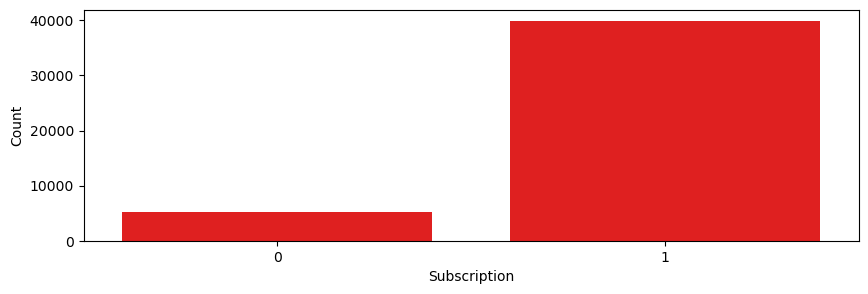

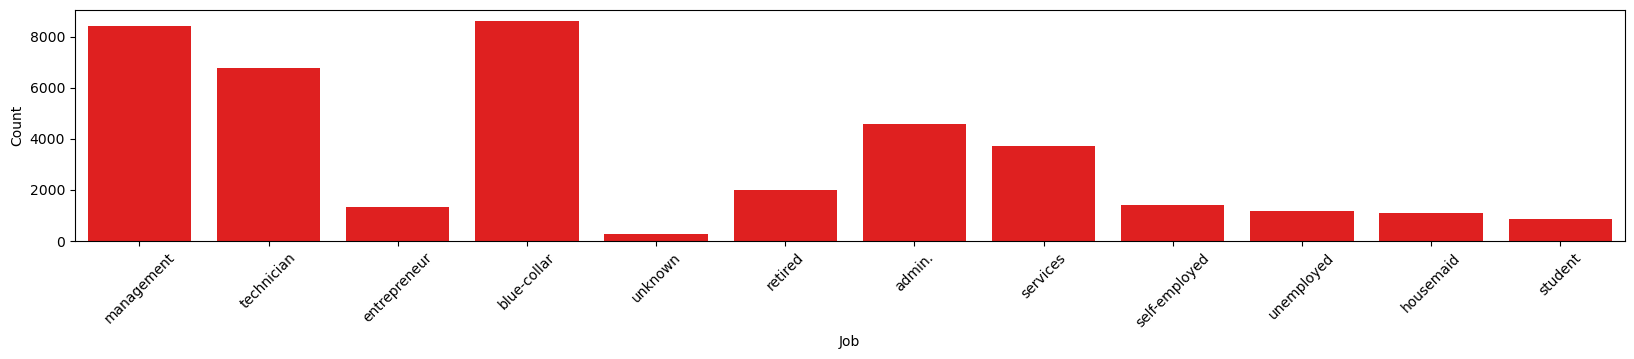

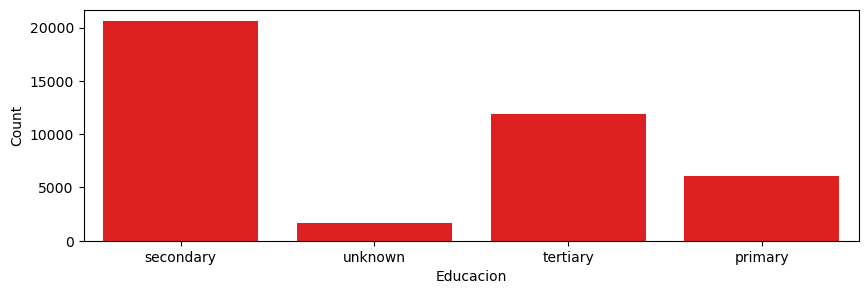

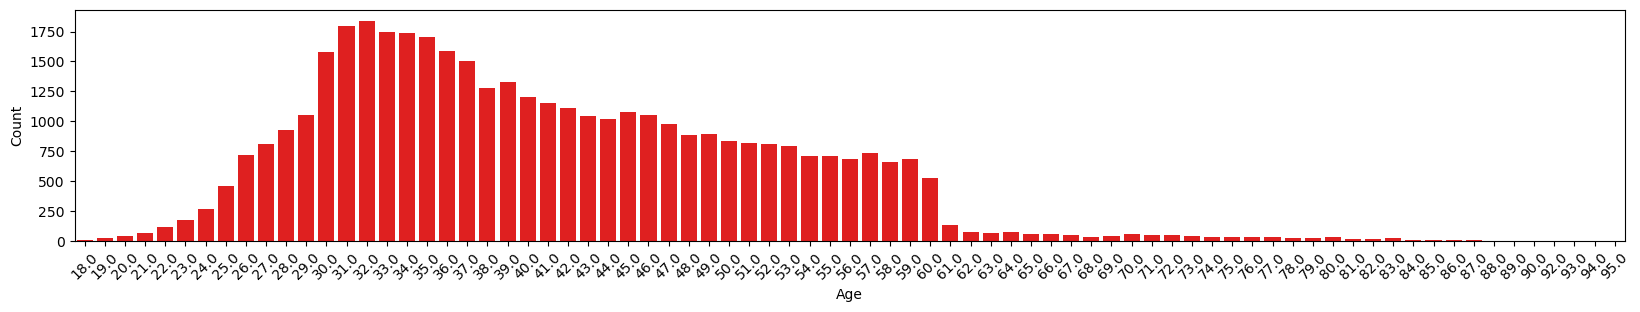

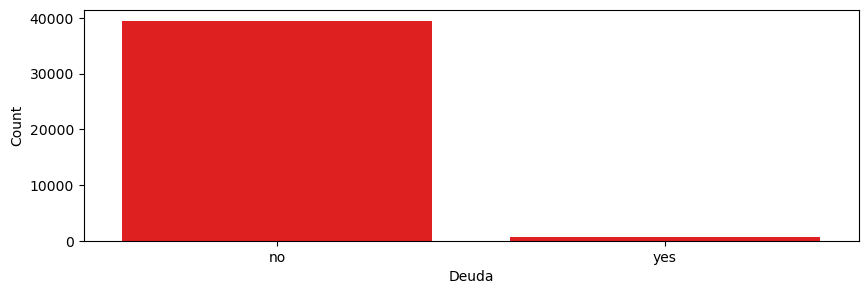

In [19]:
plt.figure(figsize=(10,3))
sns.countplot(banco.Subscription, color="red")
plt.xlabel("Subscription")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(20,3))
sns.countplot(banco.Job, color="red")
plt.xlabel("Job")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(10,3))
sns.countplot(banco.Education, color="red")
plt.xlabel("Educacion")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(20,3))
sns.countplot(banco.Age, color="red")
plt.xlabel("Age")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(10,3))
sns.countplot(banco.Deuda, color="red")
plt.xlabel("Deuda")
plt.ylabel("Count")
plt.show()

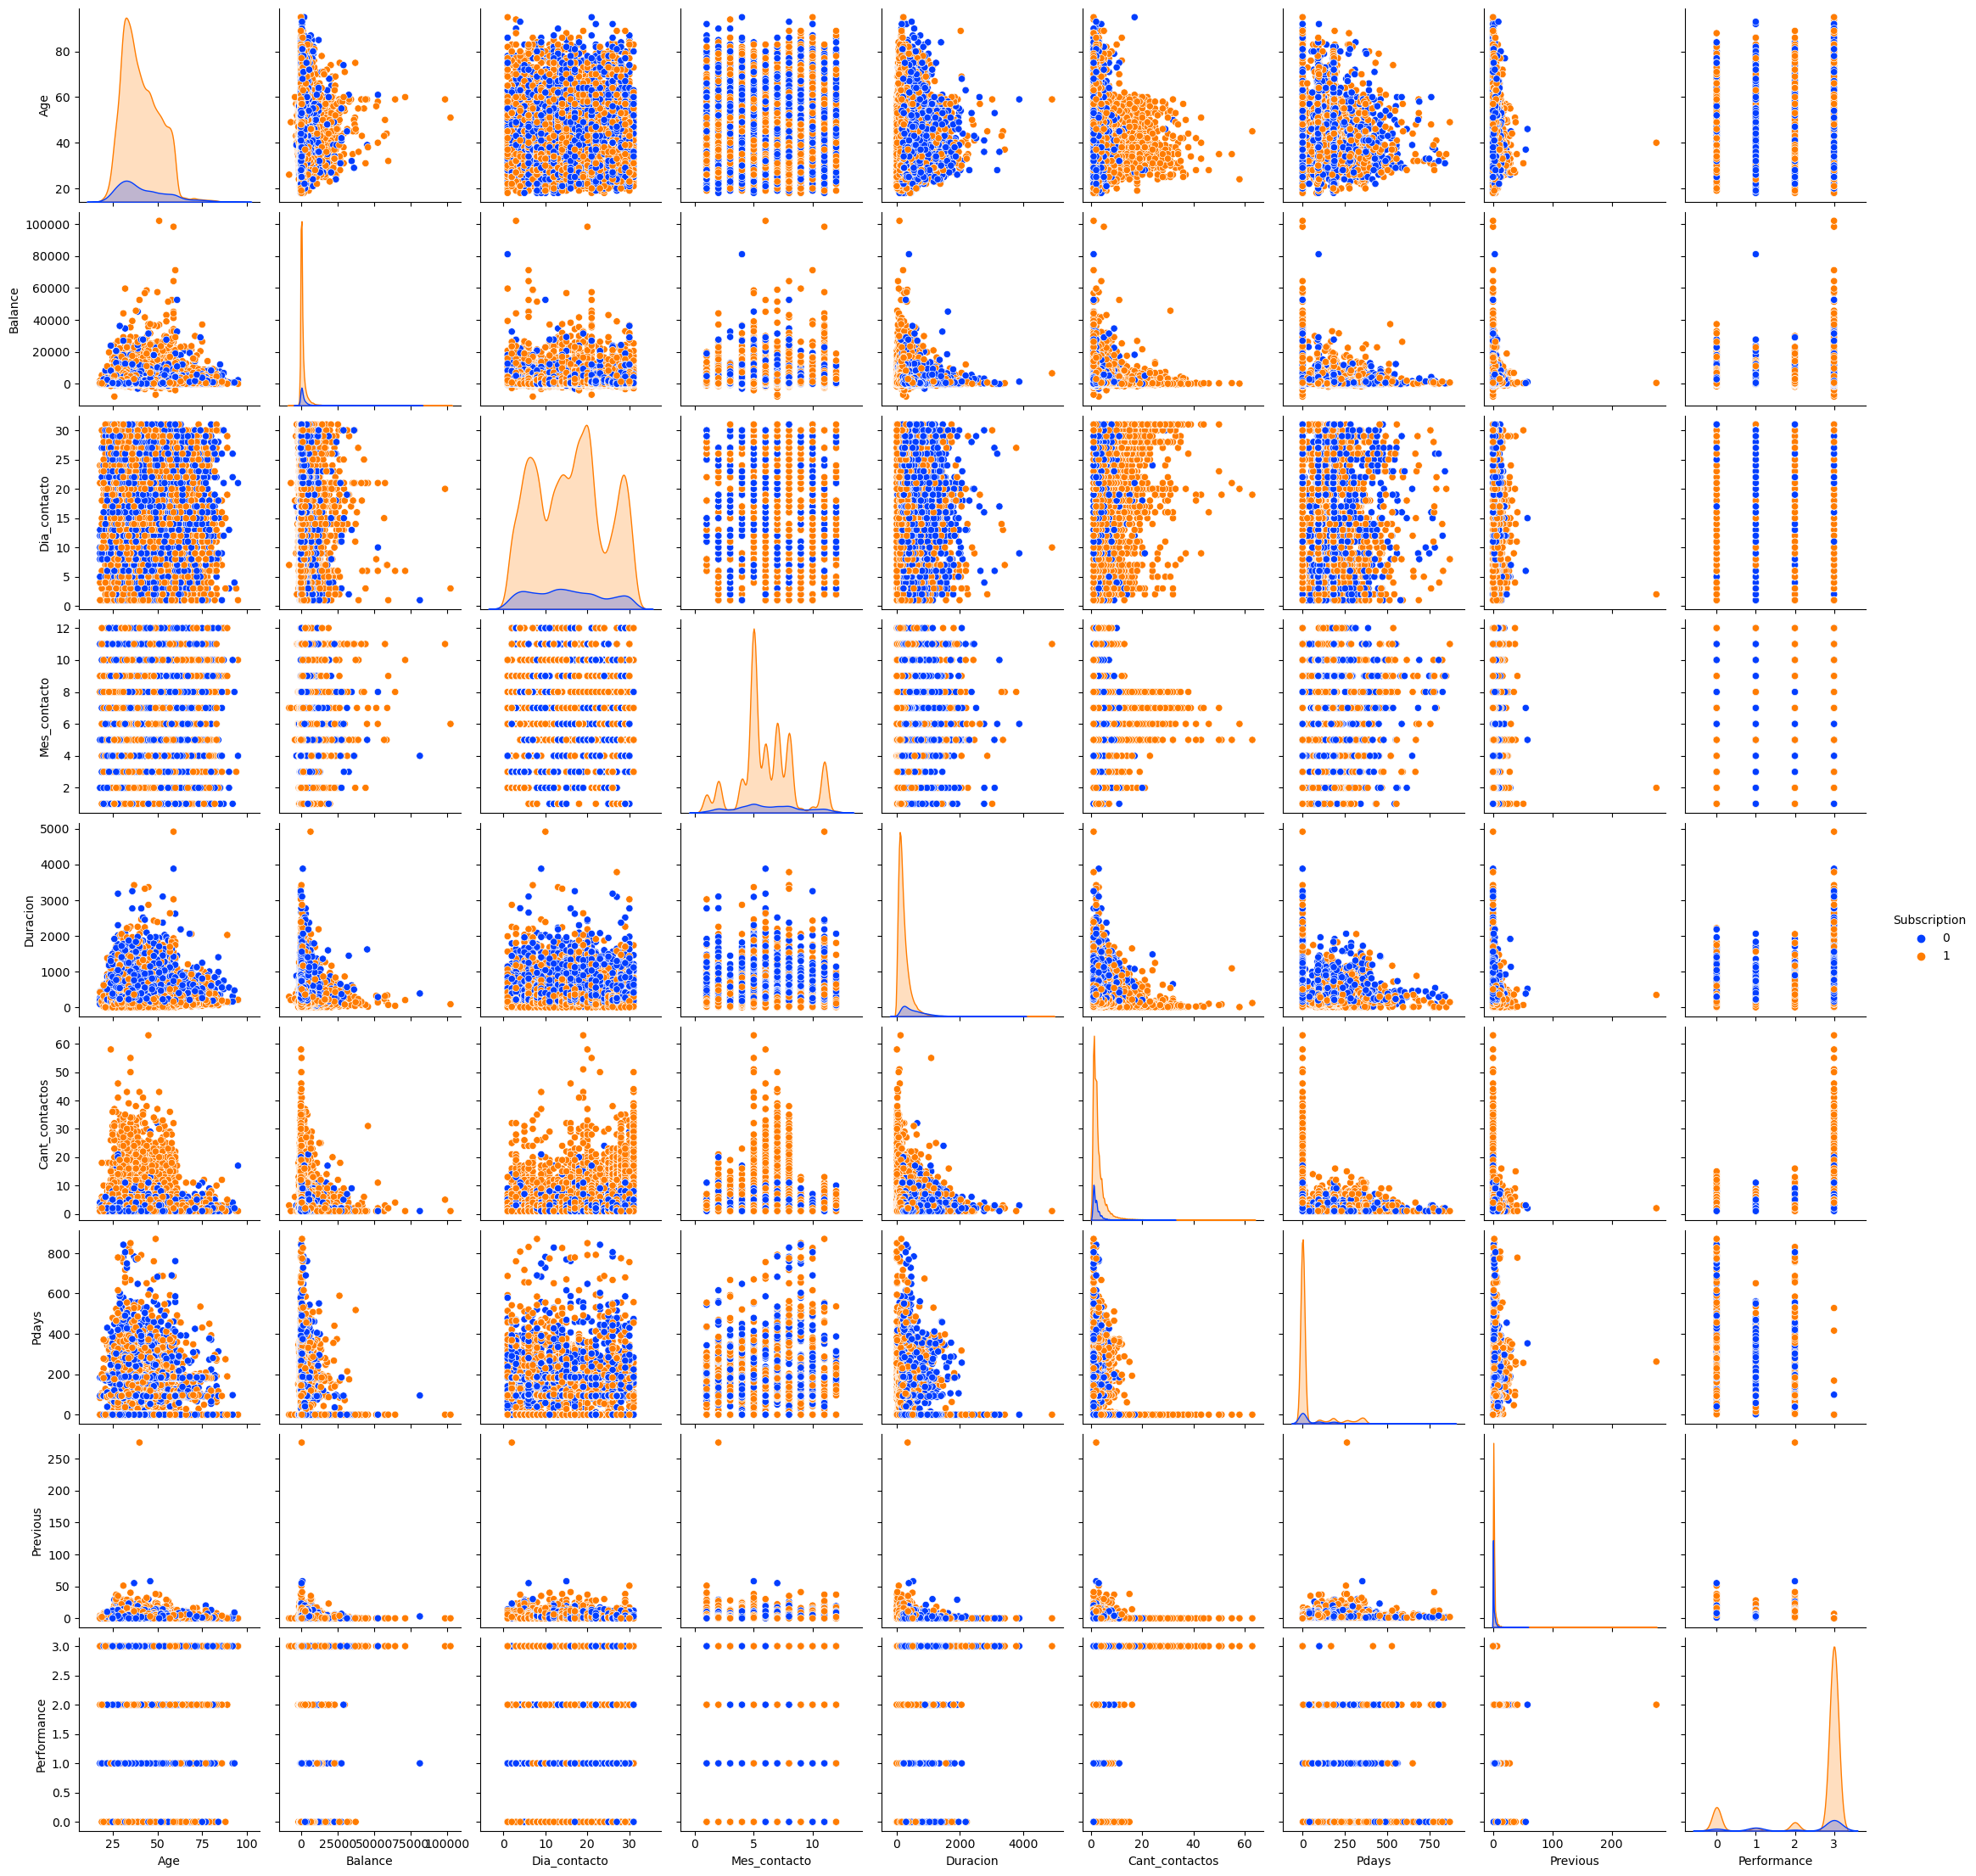

In [20]:
sns.pairplot(banco, hue= "Subscription", palette='bright')
plt.show()

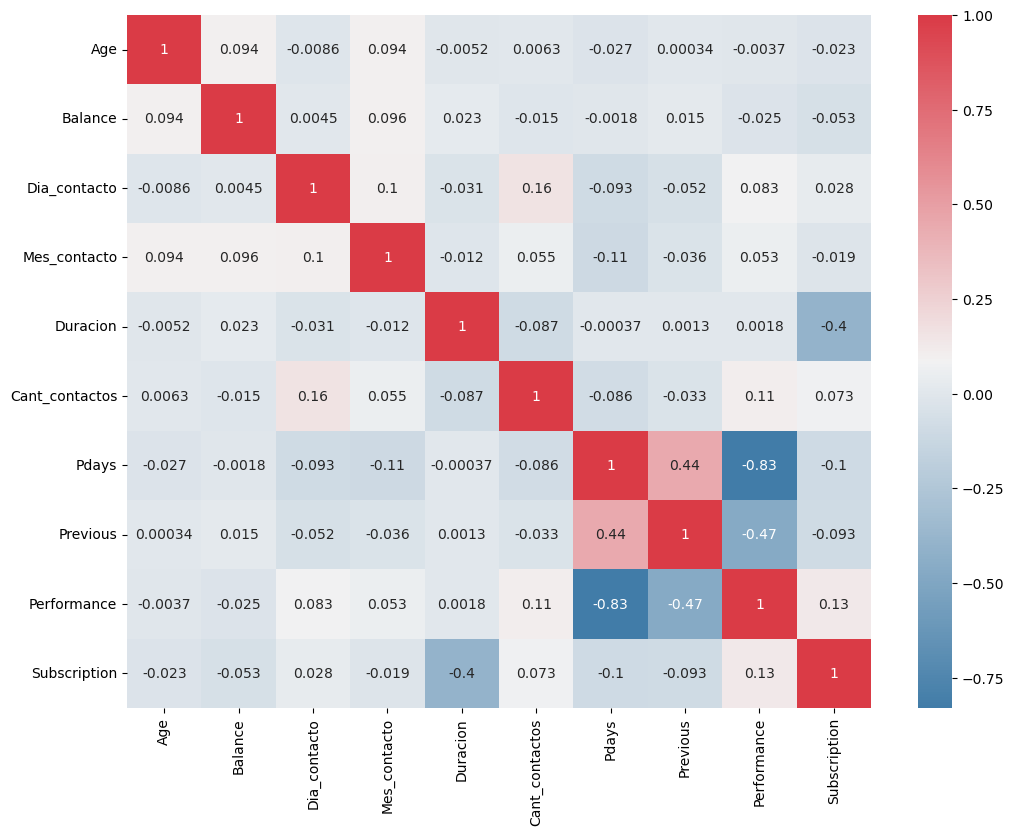

In [21]:
corrdiab = banco.corr()

f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(corrdiab,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

In [22]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              40238 non-null  float64
 1   Job              40238 non-null  object 
 2   Estado_Civil     40238 non-null  object 
 3   Education        40238 non-null  object 
 4   Deuda            40238 non-null  object 
 5   Balance          40238 non-null  float64
 6   Seguro_Vivienda  37525 non-null  object 
 7   Prestamo         37525 non-null  object 
 8   Contact          45211 non-null  object 
 9   Dia_contacto     45211 non-null  int64  
 10  Mes_contacto     45211 non-null  int64  
 11  Duracion         37525 non-null  float64
 12  Cant_contactos   45211 non-null  int64  
 13  Pdays            37525 non-null  float64
 14  Previous         45211 non-null  int64  
 15  Performance      45211 non-null  int64  
 16  Subscription     45211 non-null  int64  
dtypes: float64(4

In [23]:
total = banco.isnull().sum().sort_values(ascending=False)
total

Pdays              7686
Seguro_Vivienda    7686
Prestamo           7686
Duracion           7686
Age                4973
Estado_Civil       4973
Education          4973
Deuda              4973
Balance            4973
Job                4973
Performance           0
Previous              0
Contact               0
Cant_contactos        0
Mes_contacto          0
Dia_contacto          0
Subscription          0
dtype: int64

In [24]:
# Cantidad de valores nulos ordenados descendentemente
total = banco.isnull().sum().sort_values(ascending=False)
# Porcetaje de lo que representa para cada columna
percent = (banco.isnull().sum()/len(banco)).sort_values(ascending=False)
# Mostramos los 2 resultados en conjunto.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total   Percent
Pdays             7686  0.170003
Seguro_Vivienda   7686  0.170003
Prestamo          7686  0.170003
Duracion          7686  0.170003
Age               4973  0.109995
Estado_Civil      4973  0.109995
Education         4973  0.109995
Deuda             4973  0.109995
Balance           4973  0.109995
Job               4973  0.109995

In [25]:
np.shape(banco)

(45211, 17)

In [26]:
banco.drop("Contact", inplace=True, axis=1)
banco=banco.dropna(subset=["Job"])
banco=banco.dropna(subset=["Deuda"])
banco=banco.dropna(subset=["Estado_Civil"])
banco=banco.dropna(subset=["Seguro_Vivienda"])
banco=banco.dropna(subset=["Prestamo"])
banco=banco.dropna(subset=["Education"])
banco['Duracion'].fillna(banco['Duracion'].mean(), inplace = True)
banco['Age'].fillna(banco['Age'].mean(), inplace = True)
banco['Pdays'].fillna(banco['Pdays'].mean(), inplace = True)
banco['Balance'].fillna(banco['Balance'].mean(), inplace = True)

In [27]:
np.shape(banco)

(19586, 16)

In [28]:
# Cantidad de valores nulos ordenados descendentemente
total = banco.isnull().sum().sort_values(ascending=False)
# Porcetaje de lo que representa para cada columna
percent = (banco.isnull().sum()/len(banco)).sort_values(ascending=False)
# Mostramos los 2 resultados en conjunto.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total  Percent
Age                  0      0.0
Job                  0      0.0
Estado_Civil         0      0.0
Education            0      0.0
Deuda                0      0.0
Balance              0      0.0
Seguro_Vivienda      0      0.0
Prestamo             0      0.0
Dia_contacto         0      0.0
Mes_contacto         0      0.0

In [29]:
banco.head()

Age           Job Estado_Civil  Education Deuda  Balance  \
2   40.951798  entrepreneur      married  secondary    no      2.0   
6   28.000000    management       single   tertiary    no    447.0   
8   58.000000       retired      married    primary    no    121.0   
9   43.000000    technician       single  secondary    no    593.0   
11  29.000000        admin.       single  secondary    no    390.0   

   Seguro_Vivienda Prestamo  Dia_contacto  Mes_contacto    Duracion  \
2              yes      yes             5             5   76.000000   
6              yes      yes             5             5  217.000000   
8              yes       no             5             5   50.000000   
9              yes       no             5             5  260.449737   
11             yes       no             5             5  137.000000   

    Cant_contactos      Pdays  Previous  Performance  Subscription  
2                1  -1.000000         0            3             1  
6                1  38.319753         0            3             1  
8                1  38.319753         0            3             1  
9                1  -1.000000         0            3             1  
11               1  -1.000000         0            3             1

In [30]:
var = pd.get_dummies(banco['Seguro_Vivienda'], prefix='Seguro')
var = var.drop(['Seguro_no'], axis=1)
banco = pd.concat([banco, var], axis=1)
banco = banco.drop('Seguro_Vivienda', axis=1)
banco.rename(columns={'Seguro_yes':'Seguro_vivienda'}, inplace=True)
banco.head()

Age           Job Estado_Civil  Education Deuda  Balance Prestamo  \
2   40.951798  entrepreneur      married  secondary    no      2.0      yes   
6   28.000000    management       single   tertiary    no    447.0      yes   
8   58.000000       retired      married    primary    no    121.0       no   
9   43.000000    technician       single  secondary    no    593.0       no   
11  29.000000        admin.       single  secondary    no    390.0       no   

    Dia_contacto  Mes_contacto    Duracion  Cant_contactos      Pdays  \
2              5             5   76.000000               1  -1.000000   
6              5             5  217.000000               1  38.319753   
8              5             5   50.000000               1  38.319753   
9              5             5  260.449737               1  -1.000000   
11             5             5  137.000000               1  -1.000000   

    Previous  Performance  Subscription  Seguro_vivienda  
2          0            3             1                1  
6          0            3             1                1  
8          0            3             1                1  
9          0            3             1                1  
11         0            3             1                1

In [31]:
var = pd.get_dummies(banco['Prestamo'], prefix='Prestamo')
var = var.drop(['Prestamo_no'], axis=1)
banco = pd.concat([banco, var], axis=1)
banco = banco.drop('Prestamo', axis=1)
banco.rename(columns={'Prestamo_yes':'Prestamo_'}, inplace=True)
banco.head()

Age           Job Estado_Civil  Education Deuda  Balance  \
2   40.951798  entrepreneur      married  secondary    no      2.0   
6   28.000000    management       single   tertiary    no    447.0   
8   58.000000       retired      married    primary    no    121.0   
9   43.000000    technician       single  secondary    no    593.0   
11  29.000000        admin.       single  secondary    no    390.0   

    Dia_contacto  Mes_contacto    Duracion  Cant_contactos      Pdays  \
2              5             5   76.000000               1  -1.000000   
6              5             5  217.000000               1  38.319753   
8              5             5   50.000000               1  38.319753   
9              5             5  260.449737               1  -1.000000   
11             5             5  137.000000               1  -1.000000   

    Previous  Performance  Subscription  Seguro_vivienda  Prestamo_  
2          0            3             1                1          1  
6          0            3             1                1          1  
8          0            3             1                1          0  
9          0            3             1                1          0  
11         0            3             1                1          0

In [32]:
df_cat = banco.select_dtypes(include='object').columns.drop(["Deuda","Job"])
df_cat

Index(['Estado_Civil', 'Education'], dtype='object')

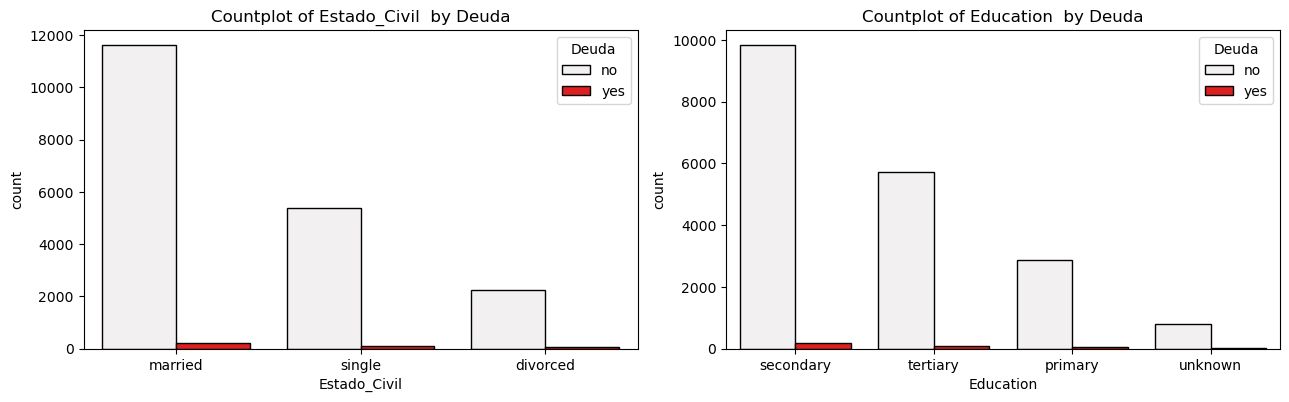

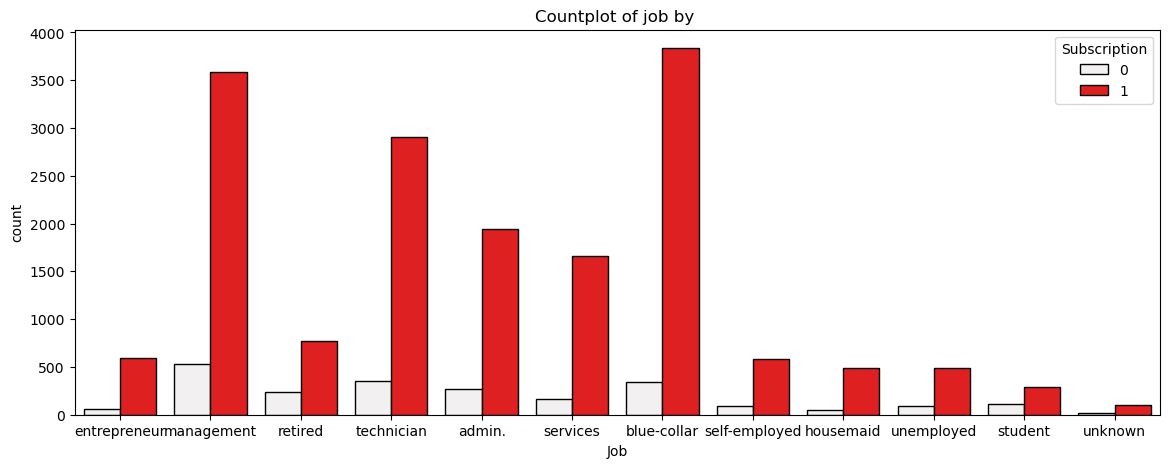

In [33]:
plt.figure(figsize=(13,15))
for i,cat_fea in enumerate(df_cat):
    plt.subplot(4,2,i+1)
    sns.countplot(x=cat_fea,hue='Subscription',data=banco,edgecolor="black", color='red')
    plt.title("Countplot of {}  by Subscription".format(cat_fea))
plt.tight_layout()    
plt.show()
plt.figure(figsize=[14,5])
sns.countplot(x='Job', hue='Subscription',edgecolor="black",data=banco, color='red')
plt.title("Countplot of job by Subscription")
plt.show()

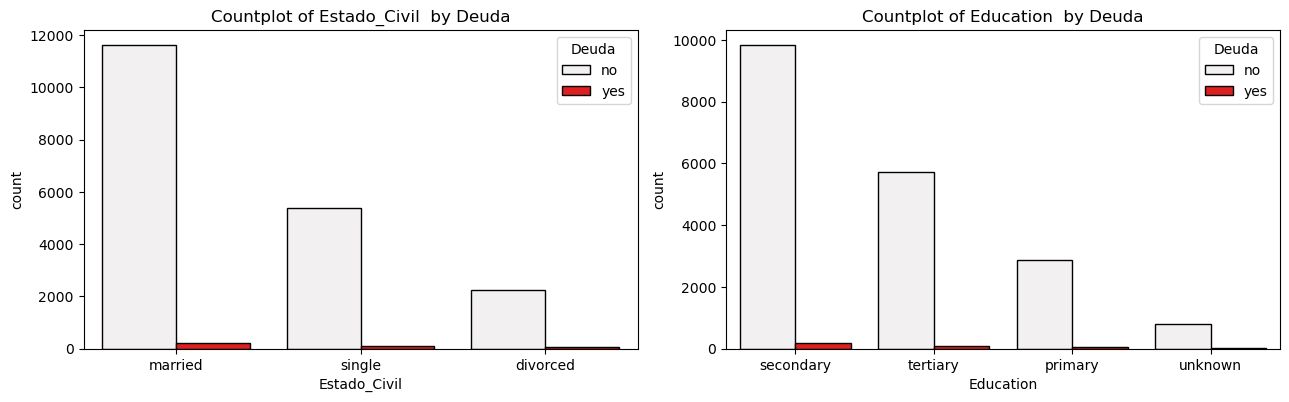

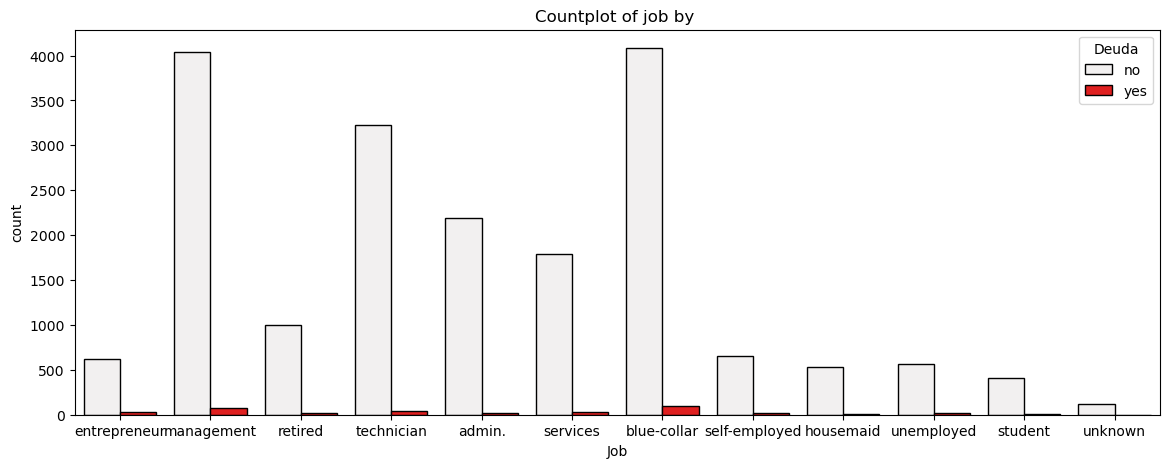

In [34]:
plt.figure(figsize=(13,15))
for i,cat_fea in enumerate(df_cat):
    plt.subplot(4,2,i+1)
    sns.countplot(x=cat_fea,hue='Deuda',data=banco,edgecolor="black", color='red')
    plt.title("Countplot of {}  by Deuda".format(cat_fea))
plt.tight_layout()    
plt.show()
plt.figure(figsize=[14,5])
sns.countplot(x='Job', hue='Deuda',edgecolor="black",data=banco, color='red')
plt.title("Countplot of job by ")
plt.show()

In [35]:
var = pd.get_dummies(banco['Deuda'], prefix='Deuda')
var = var.drop(['Deuda_no'], axis=1)
banco = pd.concat([banco, var], axis=1)
banco = banco.drop('Deuda', axis=1)
banco.rename(columns={'Deuda_yes':'Deuda_'}, inplace=True)
banco.head()

Age           Job Estado_Civil  Education  Balance  Dia_contacto  \
2   40.951798  entrepreneur      married  secondary      2.0             5   
6   28.000000    management       single   tertiary    447.0             5   
8   58.000000       retired      married    primary    121.0             5   
9   43.000000    technician       single  secondary    593.0             5   
11  29.000000        admin.       single  secondary    390.0             5   

    Mes_contacto    Duracion  Cant_contactos      Pdays  Previous  \
2              5   76.000000               1  -1.000000         0   
6              5  217.000000               1  38.319753         0   
8              5   50.000000               1  38.319753         0   
9              5  260.449737               1  -1.000000         0   
11             5  137.000000               1  -1.000000         0   

    Performance  Subscription  Seguro_vivienda  Prestamo_  Deuda_  
2             3             1                1          1       0  
6             3             1                1          1       0  
8             3             1                1          0       0  
9             3             1                1          0       0  
11            3             1                1          0       0

In [36]:
banco.describe()

Age       Balance  Dia_contacto  Mes_contacto      Duracion  \
count  19586.000000  19586.000000  19586.000000  19586.000000  19586.000000   
mean      40.951798   1370.929649     15.805320      6.147708    260.449737   
std       10.020491   2757.897096      8.307631      2.399746    240.118748   
min       18.000000  -6847.000000      1.000000      1.000000      1.000000   
25%       33.000000    106.250000      8.000000      5.000000    118.000000   
50%       40.951798    592.000000     16.000000      6.000000    221.000000   
75%       47.000000   1370.929649     21.000000      8.000000    279.000000   
max       92.000000  64343.000000     31.000000     12.000000   4918.000000   

       Cant_contactos         Pdays      Previous   Performance  Subscription  \
count    19586.000000  19586.000000  19586.000000  19586.000000  19586.000000   
mean         2.747115     38.319753      0.574543      2.575768      0.881854   
std          3.030190     89.257572      2.720563      0.976362      0.322789   
min          1.000000     -1.000000      0.000000      0.000000      0.000000   
25%          1.000000     -1.000000      0.000000      3.000000      1.000000   
50%          2.000000     -1.000000      0.000000      3.000000      1.000000   
75%          3.000000     38.319753      0.000000      3.000000      1.000000   
max         50.000000    871.000000    275.000000      3.000000      1.000000   

       Seguro_vivienda     Prestamo_        Deuda_  
count     19586.000000  19586.000000  19586.000000  
mean          0.552895      0.159706      0.018432  
std           0.497207      0.366342      0.134509  
min           0.000000      0.000000      0.000000  
25%           0.000000      0.000000      0.000000  
50%           1.000000      0.000000      0.000000  
75%           1.000000      0.000000      0.000000  
max           1.000000      1.000000      1.000000

In [37]:
banco_stats = banco.groupby('Job').agg({'Subscription':['sum'], 'Age':['mean'], 'Deuda_':['sum'], 'Prestamo_':['sum']})
banco_stats

Subscription        Age Deuda_ Prestamo_
                       sum       mean    sum       sum
Job                                                   
admin.                1945  39.663704     22     414.0
blue-collar           3837  40.021863     94     742.0
entrepreneur           593  41.959969     28     165.0
housemaid              490  45.948278     11      63.0
management            3588  40.753913     79     565.0
retired                770  59.267366     14     131.0
self-employed          586  39.587679     15     103.0
services              1660  38.756012     34     368.0
student                295  28.324247      3       4.0
technician            2908  39.487028     42     525.0
unemployed             494  40.927401     17      46.0
unknown                106  46.308231      2       2.0

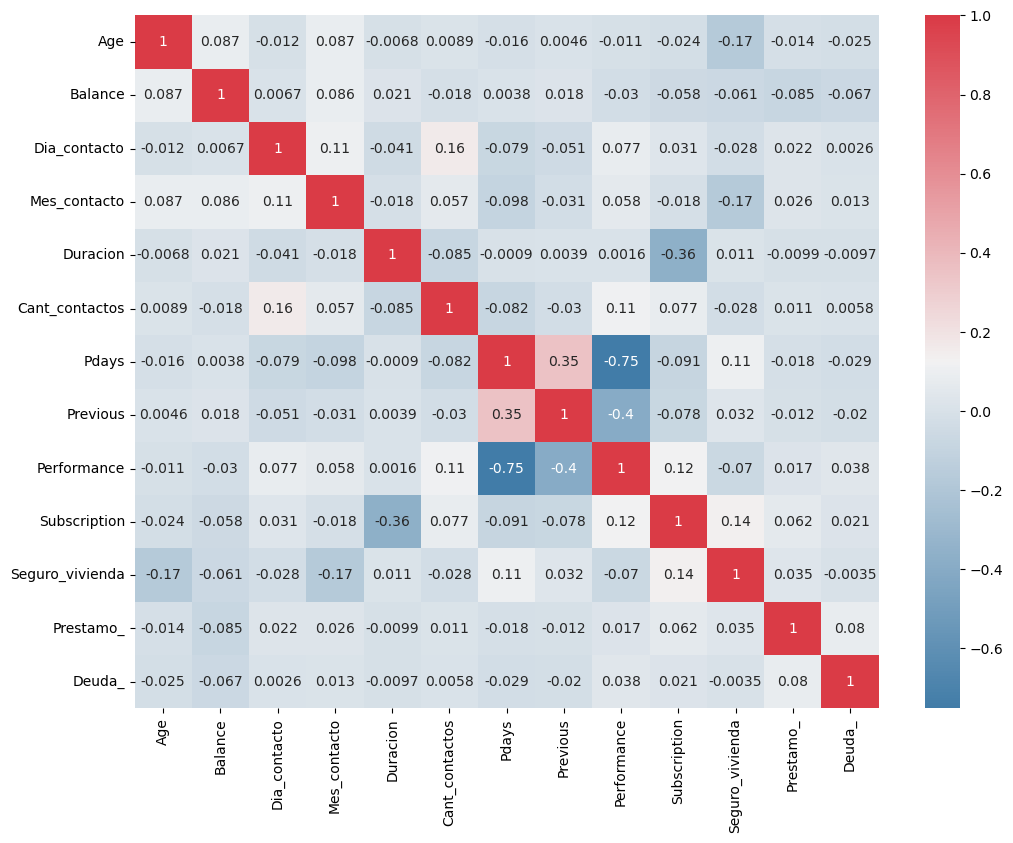

In [38]:
corrdiab = banco.corr()

f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(corrdiab,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

In [39]:
ed_s = px.bar(
    data_frame=banco,
    x = 'Education',
    y = 'Balance',
    title=(" Correlacion "),
    labels={'education':"Education",
    'balance':"Balance"},
    )

ed_s.show()


In [40]:
num_features = [col for col, dtype in banco.dtypes.items() if dtype == 'int64' or dtype == 'float64']

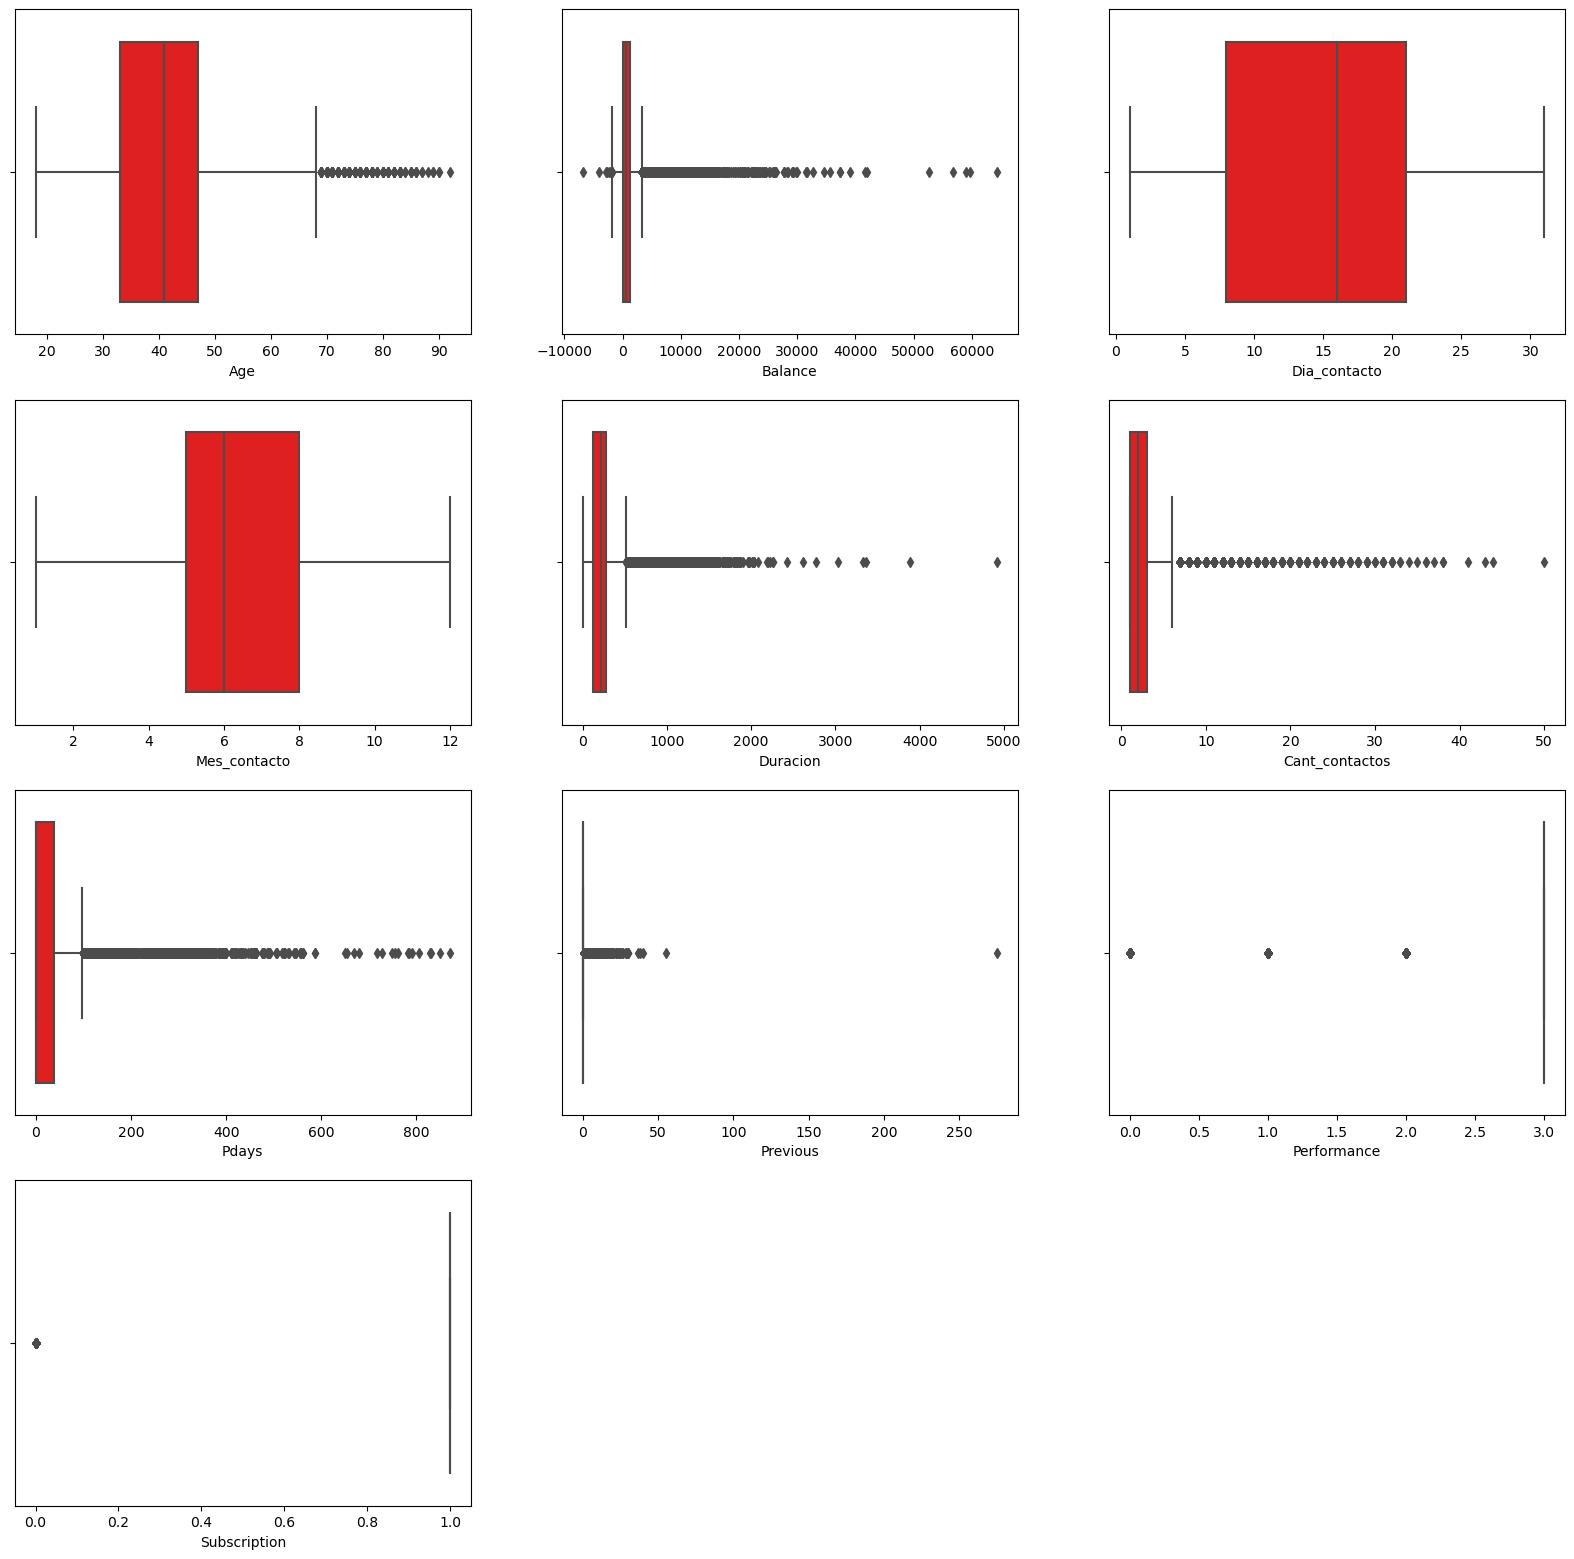

In [41]:
plt.figure(figsize=(20,60))
plotnumber =1
for num_feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data = banco, x = num_feature, color='red')
    plt.xlabel(num_feature)
    plotnumber+=1
plt.show()

In [42]:
banco[banco['Performance']==3]

Age           Job Estado_Civil  Education  Balance  Dia_contacto  \
2      40.951798  entrepreneur      married  secondary      2.0             5   
6      28.000000    management       single   tertiary    447.0             5   
8      58.000000       retired      married    primary    121.0             5   
9      43.000000    technician       single  secondary    593.0             5   
11     29.000000        admin.       single  secondary    390.0             5   
...          ...           ...          ...        ...      ...           ...   
45167  48.000000        admin.      married  secondary    178.0            10   
45176  54.000000        admin.      married  secondary     66.0            11   
45197  36.000000    management       single  secondary   1511.0            16   
45203  40.951798       student       single   tertiary    113.0            17   
45209  57.000000   blue-collar      married  secondary    668.0            17   

       Mes_contacto    Duracion  Cant_contactos      Pdays  Previous  \
2                 5   76.000000               1  -1.000000         0   
6                 5  217.000000               1  38.319753         0   
8                 5   50.000000               1  38.319753         0   
9                 5  260.449737               1  -1.000000         0   
11                5  137.000000               1  -1.000000         0   
...             ...         ...             ...        ...       ...   
45167            11  228.000000               1  -1.000000         0   
45176            11  167.000000               1  -1.000000         0   
45197            11  270.000000               1  38.319753         0   
45203            11  266.000000               1  -1.000000         0   
45209            11  508.000000               4  -1.000000         0   

       Performance  Subscription  Seguro_vivienda  Prestamo_  Deuda_  
2                3             1                1          1       0  
6                3             1                1          1       0  
8                3             1                1          0       0  
9                3             1                1          0       0  
11               3             1                1          0       0  
...            ...           ...              ...        ...     ...  
45167            3             1                0          0       0  
45176            3             0                1          0       0  
45197            3             0                1          0       0  
45203            3             0                0          0       0  
45209            3             1                0          0       0  

[16114 rows x 16 columns]

In [43]:
banco[banco['Previous']==0]

Age           Job Estado_Civil  Education  Balance  Dia_contacto  \
2      40.951798  entrepreneur      married  secondary      2.0             5   
6      28.000000    management       single   tertiary    447.0             5   
8      58.000000       retired      married    primary    121.0             5   
9      43.000000    technician       single  secondary    593.0             5   
11     29.000000        admin.       single  secondary    390.0             5   
...          ...           ...          ...        ...      ...           ...   
45167  48.000000        admin.      married  secondary    178.0            10   
45176  54.000000        admin.      married  secondary     66.0            11   
45197  36.000000    management       single  secondary   1511.0            16   
45203  40.951798       student       single   tertiary    113.0            17   
45209  57.000000   blue-collar      married  secondary    668.0            17   

       Mes_contacto    Duracion  Cant_contactos      Pdays  Previous  \
2                 5   76.000000               1  -1.000000         0   
6                 5  217.000000               1  38.319753         0   
8                 5   50.000000               1  38.319753         0   
9                 5  260.449737               1  -1.000000         0   
11                5  137.000000               1  -1.000000         0   
...             ...         ...             ...        ...       ...   
45167            11  228.000000               1  -1.000000         0   
45176            11  167.000000               1  -1.000000         0   
45197            11  270.000000               1  38.319753         0   
45203            11  266.000000               1  -1.000000         0   
45209            11  508.000000               4  -1.000000         0   

       Performance  Subscription  Seguro_vivienda  Prestamo_  Deuda_  
2                3             1                1          1       0  
6                3             1                1          1       0  
8                3             1                1          0       0  
9                3             1                1          0       0  
11               3             1                1          0       0  
...            ...           ...              ...        ...     ...  
45167            3             1                0          0       0  
45176            3             0                1          0       0  
45197            3             0                1          0       0  
45203            3             0                0          0       0  
45209            3             1                0          0       0  

[16110 rows x 16 columns]

Conclusión: 
Como se ve arriba, pdays -1 significa que estas personas son nuevas o se involucran por primera vez en la campaña y no tienen contacto previo por lo que previous ==0 y los resultados de performance son desconocidos para todos los valores de -1 de pdays, por lo que eliminaremos las columnas pdays

In [44]:
banco.drop("Pdays",inplace=True,axis=1)

In [45]:
banco.head()

Age           Job Estado_Civil  Education  Balance  Dia_contacto  \
2   40.951798  entrepreneur      married  secondary      2.0             5   
6   28.000000    management       single   tertiary    447.0             5   
8   58.000000       retired      married    primary    121.0             5   
9   43.000000    technician       single  secondary    593.0             5   
11  29.000000        admin.       single  secondary    390.0             5   

    Mes_contacto    Duracion  Cant_contactos  Previous  Performance  \
2              5   76.000000               1         0            3   
6              5  217.000000               1         0            3   
8              5   50.000000               1         0            3   
9              5  260.449737               1         0            3   
11             5  137.000000               1         0            3   

    Subscription  Seguro_vivienda  Prestamo_  Deuda_  
2              1                1          1       0  
6              1                1          1       0  
8              1                1          0       0  
9              1                1          0       0  
11             1                1          0       0

In [46]:
banco[(banco['Balance']>40000)|(banco['Balance']<0)]
#-0 se elimina dado que un balance negativo implica una persona endeudada

Age          Job Estado_Civil  Education  Balance  Dia_contacto  \
25     44.000000       admin.      married  secondary   -372.0             5   
37     53.000000   technician      married  secondary     -3.0             5   
45     36.000000       admin.       single    primary   -171.0             5   
100    44.000000  blue-collar      married  secondary   -674.0             5   
127    40.951798     services      married  secondary    -16.0             5   
...          ...          ...          ...        ...      ...           ...   
44459  29.000000       admin.       single   tertiary   -197.0             6   
44469  35.000000       admin.       single  secondary    -32.0             6   
44541  40.951798   management       single   tertiary    -62.0            12   
44629  28.000000  blue-collar       single  secondary    -46.0             1   
44908  48.000000   management     divorced   tertiary   -130.0            29   

       Mes_contacto     Duracion  Cant_contactos  Previous  Performance  \
25                5   172.000000               1         0            3   
37                5  1666.000000               1         0            3   
45                5   242.000000               1         0            3   
100               5   257.000000               1         0            3   
127               5    78.000000               1         0            3   
...             ...          ...             ...       ...          ...   
44459             8    47.000000               1         0            3   
44469             8   366.000000               2         9            1   
44541             8    17.000000               1         0            3   
44629             9   199.000000               1        14            1   
44908             9   260.449737               2         9            0   

       Subscription  Seguro_vivienda  Prestamo_  Deuda_  
25                1                1          0       0  
37                1                0          0       0  
45                1                1          0       0  
100               1                1          0       0  
127               1                1          1       0  
...             ...              ...        ...     ...  
44459             1                0          0       0  
44469             0                0          1       0  
44541             1                0          0       0  
44629             0                1          0       0  
44908             1                1          0       0  

[1472 rows x 15 columns]

In [47]:
banco.drop(banco[(banco['Balance']>40000)|(banco['Balance']<0)].index,inplace=True,axis=0)

In [48]:
banco[banco['Duracion']>3000]

Age            Job Estado_Civil  Education      Balance  Dia_contacto  \
2386   45.0    blue-collar      married  secondary    66.000000            13   
9947   59.0     management      married  secondary  1321.000000             9   
21113  43.0  self-employed      married   tertiary  1370.929649            14   
24148  59.0     technician      married   tertiary  6573.000000            10   
28872  59.0     unemployed      married    primary     0.000000            30   

       Mes_contacto  Duracion  Cant_contactos  Previous  Performance  \
2386              5    3366.0               3         0            3   
9947              6    3881.0               3         0            3   
21113             8    3322.0               2         0            3   
24148            11    4918.0               1         0            3   
28872             1    3025.0               2         0            3   

       Subscription  Seguro_vivienda  Prestamo_  Deuda_  
2386              1                1          0       0  
9947              0                0          0       0  
21113             1                0          0       0  
24148             1                1          0       0  
28872             1                0          0       0

In [49]:
banco.drop(banco[banco['Duracion']>3000].index,inplace=True,axis=0)

In [50]:
banco[banco['Cant_contactos']>40]

Age          Job Estado_Civil  Education  Balance  Dia_contacto  \
11301  28.000000  blue-collar       single  secondary    623.0            18   
13675  51.000000  blue-collar      married    unknown     41.0             9   
18713  35.000000  blue-collar      married  secondary    280.0            31   
18744  40.951798  blue-collar      married    primary    371.0            31   

       Mes_contacto    Duracion  Cant_contactos  Previous  Performance  \
11301             6   25.000000              41         0            3   
13675             7  260.449737              43         0            3   
18713             7   65.000000              50         0            3   
18744             7   18.000000              44         0            3   

       Subscription  Seguro_vivienda  Prestamo_  Deuda_  
11301             1                0          0       0  
13675             1                1          0       0  
18713             1                1          1       0  
18744             1                1          0       0

In [51]:
banco.drop(banco[banco['Cant_contactos']>30].index,axis=0,inplace=True)

In [52]:
banco[banco['Previous']>30]

Age         Job Estado_Civil  Education      Balance  Dia_contacto  \
28498  49.0  management       single   tertiary   145.000000            29   
29182  40.0  management      married   tertiary   543.000000             2   
42422  27.0     student       single  secondary    91.000000             4   
42611  35.0  technician       single  secondary  1370.929649            11   
44089  37.0  technician      married  secondary   432.000000             6   

       Mes_contacto  Duracion  Cant_contactos  Previous  Performance  \
28498             1      57.0               2        38            0   
29182             2     349.0               2       275            2   
42422            12     157.0               6        37            2   
42611             1     502.0               3        40            2   
44089             7     386.0               3        55            0   

       Subscription  Seguro_vivienda  Prestamo_  Deuda_  
28498             1                1          0       0  
29182             1                1          0       0  
42422             1                0          0       0  
42611             1                1          0       0  
44089             0                1          0       0

In [53]:
banco.drop(banco[banco['Previous']>30].index,axis=0,inplace=True)

In [54]:
banco = pd.get_dummies(banco, columns = ['Job','Estado_Civil','Education'])

In [55]:
banco.head()

Age  Balance  Dia_contacto  Mes_contacto    Duracion  \
2   40.951798      2.0             5             5   76.000000   
6   28.000000    447.0             5             5  217.000000   
8   58.000000    121.0             5             5   50.000000   
9   43.000000    593.0             5             5  260.449737   
11  29.000000    390.0             5             5  137.000000   

    Cant_contactos  Previous  Performance  Subscription  Seguro_vivienda  ...  \
2                1         0            3             1                1  ...   
6                1         0            3             1                1  ...   
8                1         0            3             1                1  ...   
9                1         0            3             1                1  ...   
11               1         0            3             1                1  ...   

    Job_technician  Job_unemployed  Job_unknown  Estado_Civil_divorced  \
2                0               0            0                      0   
6                0               0            0                      0   
8                0               0            0                      0   
9                1               0            0                      0   
11               0               0            0                      0   

    Estado_Civil_married  Estado_Civil_single  Education_primary  \
2                      1                    0                  0   
6                      0                    1                  0   
8                      1                    0                  1   
9                      0                    1                  0   
11                     0                    1                  0   

    Education_secondary  Education_tertiary  Education_unknown  
2                     1                   0                  0  
6                     0                   1                  0  
8                     0                   0                  0  
9                     1                   0                  0  
11                    1                   0                  0  

[5 rows x 31 columns]

In [56]:
np.shape(banco)

(18085, 31)